<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.839320,50.730664,39.093643,-4353.029522,-4173.365895,1533.955002,-5707.320896
1,0.0,1.0,79.651725,78.769825,29.533777,-1591.033446,-1393.078119,918.144927,-2311.223046
2,0.0,2.0,70.007736,61.939931,48.877230,-3376.965395,-3186.140497,468.439429,-3654.579926
3,0.0,3.0,20.516805,69.200002,31.065903,-106.481688,24.301022,-2643.245714,2667.546736
4,0.0,4.0,49.974453,50.497181,68.208452,4646.991397,4825.671482,-789.468833,5615.140316
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.950109,72.204398,61.316498,9033.140636,9259.611641,999.717040,8259.894601
29996,999.0,26.0,75.627538,25.941807,34.249865,-1160.740395,-1014.921186,229.898894,-1244.820080
29997,999.0,27.0,95.725855,37.113397,53.745533,-2694.533490,-2497.948705,719.550130,-3217.498835
29998,999.0,28.0,58.588244,87.495371,99.119320,-8052.541829,-7797.338894,1118.284306,-8915.623200


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.839320,50.730664,39.093643,-4353.029522,-4173.365895,1533.955002,-5707.320896
1,0.0,1.0,79.651725,78.769825,29.533777,-1591.033446,-1393.078119,918.144927,-2311.223046
2,0.0,2.0,70.007736,61.939931,48.877230,-3376.965395,-3186.140497,468.439429,-3654.579926
3,0.0,3.0,20.516805,69.200002,31.065903,-106.481688,24.301022,-2643.245714,2667.546736
4,0.0,4.0,49.974453,50.497181,68.208452,4646.991397,4825.671482,-789.468833,5615.140316
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.950109,72.204398,61.316498,9033.140636,9259.611641,999.717040,8259.894601
29996,999.0,26.0,75.627538,25.941807,34.249865,-1160.740395,-1014.921186,229.898894,-1244.820080
29997,999.0,27.0,95.725855,37.113397,53.745533,-2694.533490,-2497.948705,719.550130,-3217.498835
29998,999.0,28.0,58.588244,87.495371,99.119320,-8052.541829,-7797.338894,1118.284306,-8915.623200


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    79.839320  50.730664  ...  1533.955002 -5707.320896
      1.0    79.651725  78.769825  ...   918.144927 -2311.223046
      2.0    70.007736  61.939931  ...   468.439429 -3654.579926
      3.0    20.516805  69.200002  ... -2643.245714  2667.546736
      4.0    49.974453  50.497181  ...  -789.468833  5615.140316
...                ...        ...  ...          ...          ...
999.0 25.0   82.950109  72.204398  ...   999.717040  8259.894601
      26.0   75.627538  25.941807  ...   229.898894 -1244.820080
      27.0   95.725855  37.113397  ...   719.550130 -3217.498835
      28.0   58.588244  87.495371  ...  1118.284306 -8915.623200
      29.0   62.495764  47.553659  ...   411.175007  1030.503827

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    79.839320  50.730664  ...  1533.955002 -5707.320896
      1.0    79.651725  78.769825  ...   918.144927 -2311.223046
      2.0    70.007736  61.939931  ...   468.439429 -3654.579926
      3.0    20.516805  69.200002  ... -2643.245714  2667.546736
      4.0    49.974453  50.497181  ...  -789.468833  5615.140316
...                ...        ...  ...          ...          ...
999.0 25.0   82.950109  72.204398  ...   999.717040  8259.894601
      26.0   75.627538  25.941807  ...   229.898894 -1244.820080
      27.0   95.725855  37.113397  ...   719.550130 -3217.498835
      28.0   58.588244  87.495371  ...  1118.284306 -8915.623200
      29.0   62.495764  47.553659  ...   411.175007  1030.503827

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.839320,50.730664,39.093643,-4353.029522,-4173.365895,1533.955002,-5707.320896
1,0.0,1.0,79.651725,78.769825,29.533777,-1591.033446,-1393.078119,918.144927,-2311.223046
2,0.0,2.0,70.007736,61.939931,48.877230,-3376.965395,-3186.140497,468.439429,-3654.579926
3,0.0,3.0,20.516805,69.200002,31.065903,-106.481688,24.301022,-2643.245714,2667.546736
4,0.0,4.0,49.974453,50.497181,68.208452,4646.991397,4825.671482,-789.468833,5615.140316
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.950109,72.204398,61.316498,9033.140636,9259.611641,999.717040,8259.894601
29996,999.0,26.0,75.627538,25.941807,34.249865,-1160.740395,-1014.921186,229.898894,-1244.820080
29997,999.0,27.0,95.725855,37.113397,53.745533,-2694.533490,-2497.948705,719.550130,-3217.498835
29998,999.0,28.0,58.588244,87.495371,99.119320,-8052.541829,-7797.338894,1118.284306,-8915.623200


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    79.839320  50.730664  ...  1533.955002 -5707.320896
      1.0    79.651725  78.769825  ...   918.144927 -2311.223046
      2.0    70.007736  61.939931  ...   468.439429 -3654.579926
      3.0    20.516805  69.200002  ... -2643.245714  2667.546736
      4.0    49.974453  50.497181  ...  -789.468833  5615.140316
...                ...        ...  ...          ...          ...
999.0 25.0   82.950109  72.204398  ...   999.717040  8259.894601
      26.0   75.627538  25.941807  ...   229.898894 -1244.820080
      27.0   95.725855  37.113397  ...   719.550130 -3217.498835
      28.0   58.588244  87.495371  ...  1118.284306 -8915.623200
      29.0   62.495764  47.553659  ...   411.175007  1030.503827

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

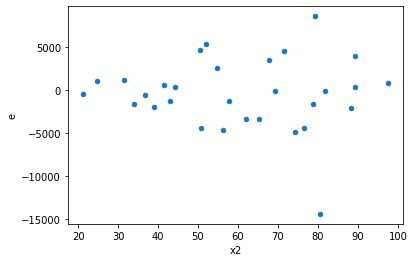

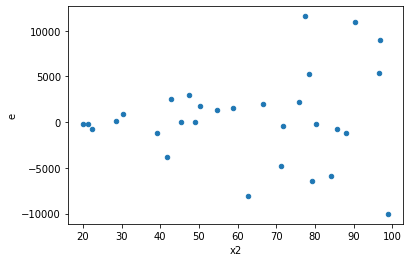

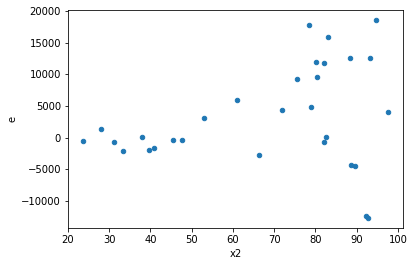

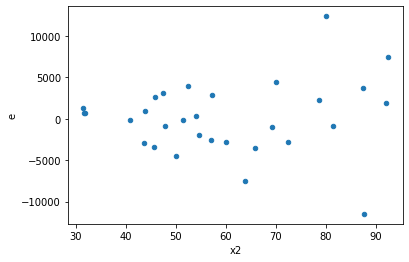

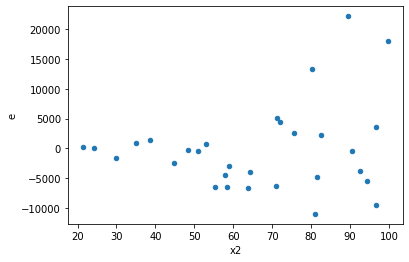

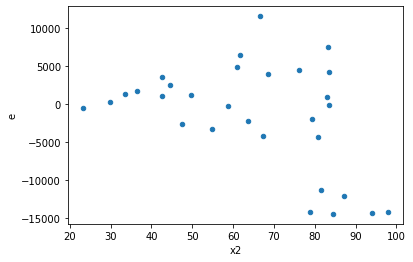

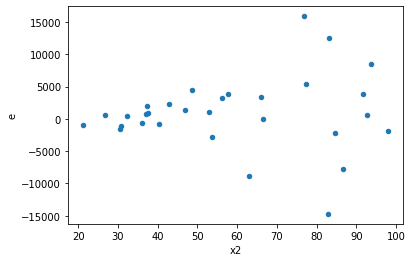

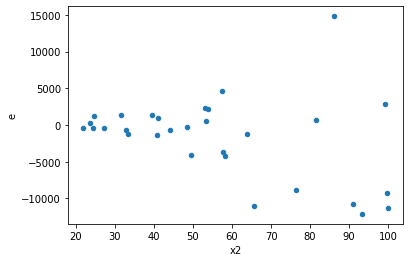

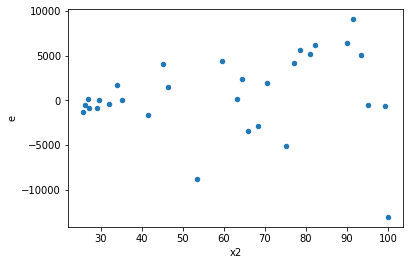

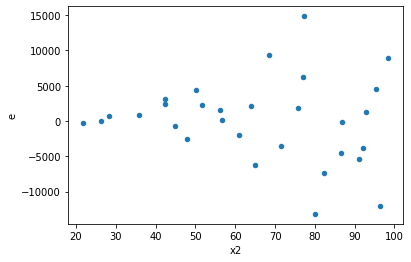

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,260623033.56577492,56169317.523402646,32577879.195721865,7021164.690425331,4.639953715962237,0.03198659776942114,0.9840067011152894,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,439308177.547412,23319087.144254647,54913522.1934265,2914885.893031831,18.838995490252227,0.00016569698398360977,0.9999171515080082,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,400325316.98834974,56130591.03048394,50040664.62354372,7016323.878810492,7.13203459359509,0.007341573647822841,0.9963292131760886,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,403663631.3628939,50583999.25696558,50457953.920361735,6322999.907120697,7.980065579874215,0.004872355367367964,0.997563822316316,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,1150423547.2602432,31099366.991916362,143802943.4075304,3887420.8739895453,36.99186377521035,9.558302476841973e-06,0.9999952208487616,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,574895687.2423964,56356998.30143686,71861960.90529954,7044624.787679607,10.200963581620334,0.001929794036442667,0.9990351029817787,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,585248616.3815498,6104262.135579381,73156077.04769373,763032.7669474226,95.87540695055709,1.4832044725743287e-07,0.9999999258397764,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,527837251.3411747,8692816.558337389,65979656.41764684,1086602.0697921736,60.721084794423675,1.1087300404444278e-06,0.9999994456349798,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,341935980.9426664,17122747.345525548,42741997.6178333,2140343.4181906935,19.969691431090343,0.0001301659085928275,0.9999349170457036,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,260623033.56577492,56169317.523402646,32577879.195721865,7021164.690425331,4.639953715962237,0.03198659776942114,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,439308177.547412,23319087.144254647,54913522.1934265,2914885.893031831,18.838995490252227,0.00016569698398360977,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,400325316.98834974,56130591.03048394,50040664.62354372,7016323.878810492,7.13203459359509,0.007341573647822841,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,403663631.3628939,50583999.25696558,50457953.920361735,6322999.907120697,7.980065579874215,0.004872355367367964,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,1150423547.2602432,31099366.991916362,143802943.4075304,3887420.8739895453,36.99186377521035,9.558302476841973e-06,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,574895687.2423964,56356998.30143686,71861960.90529954,7044624.787679607,10.200963581620334,0.001929794036442667,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,585248616.3815498,6104262.135579381,73156077.04769373,763032.7669474226,95.87540695055709,1.4832044725743287e-07,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,527837251.3411747,8692816.558337389,65979656.41764684,1086602.0697921736,60.721084794423675,1.1087300404444278e-06,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,341935980.9426664,17122747.345525548,42741997.6178333,2140343.4181906935,19.969691431090343,0.0001301659085928275,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    900
Reject001=1 : Homoscedasticity      100
Name: Result_test, dtype: int64